#**Overview**

The Enron email dataset contains approximately 500,000 emails generated by employees of the Enron Corporation. It was obtained by the Federal Energy Regulatory Commission during its investigation of Enron's collapse.

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Autocompletion/

/content/drive/MyDrive/Autocompletion


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  emails.csv.zip
  inflating: emails.csv              


In [ ]:
emails = pd.read_csv('/content/drive/MyDrive/Autocompletion/emails.csv', skiprows=lambda x:x%2)
# >>> this file is too big(around 0.5M rows) and take much time in our analysis
# so if you are begineer then only extract half of data using given skiprows parameter
emails.shape
cols = emails.columns
emails.head(3)

,file,message
0,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
1,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
2,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...


In [ ]:
import email
message = emails.loc[0]["message"]
e = email.message_from_string(message)
e.items()


[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [ ]:
e.get_payload()

"Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

In [ ]:
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [ ]:
emails["date"] = get_field("Date", emails["message"])
emails["subject"] = get_field("Subject", emails["message"])
emails["X-Folder"] = get_field("X-Folder", emails["message"])
emails["X-From"] = get_field("X-From", emails["message"])
emails["X-To"] = get_field("X-To", emails["message"])
emails.head(3)

,file,message,date,subject,X-Folder,X-From,X-To
0,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...
1,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay
2,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper


In [ ]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

emails["body"] = body(emails["message"])
emails.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,body
0,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...
1,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s..."
2,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,"Greg,\n\n How about either next Tuesday or Thu..."


#**EDA**

## Distribution of message length

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


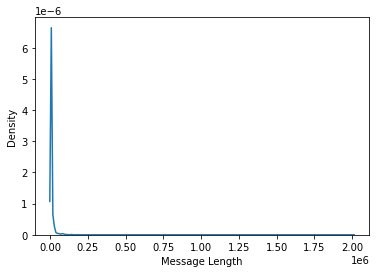

In [ ]:
emails['Message Length'] = emails['body'].apply(lambda x: len(x))

sns.distplot(emails['Message Length'],bins=None,hist=False)

**Observations**

*   The message length distribution is right skewed




In [ ]:
emails['Message Length'].max()

2011422

**Observation**

*   The maximum message length is more than 2 million




## CDF of message length

Text(0.5, 1.0, 'CDF of message length')

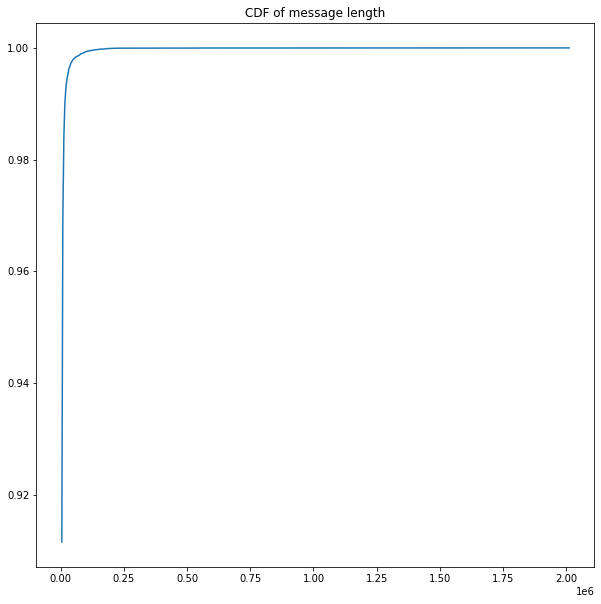

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
counts, bin_edges = np.histogram(emails['Message Length'], bins=500, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('CDF of message length')

**Observations**

*   99% messages have length below 500000




## Top 10 Employee with most mails sent

In [ ]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

emails["employee"] = employee(emails["file"])
emails.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,Traveling to have a business meeting takes the...,allen-p
1,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Randall L Gay,"Randy,\n\n Can you send me a schedule of the s...",allen-p
2,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Greg Piper,"Greg,\n\n How about either next Tuesday or Thu...",allen-p


In [ ]:
top_10 = pd.DataFrame(emails["employee"].value_counts()[:10])
top_10.reset_index(inplace=True)
top_10.columns = ["employee_name", "count"]
top_10

,employee_name,count
0,kaminski-v,14233
1,dasovich-j,14117
2,kean-s,12675
3,mann-k,11691
4,jones-t,9975
5,shackleton-s,9344
6,taylor-m,6938
7,farmer-d,6516
8,germany-c,6218
9,beck-s,5915


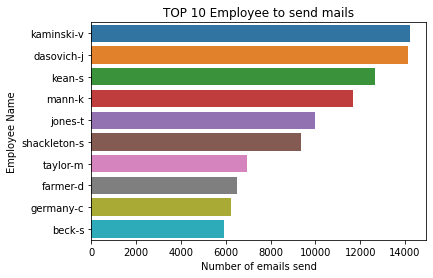

In [ ]:
sns.barplot(y="employee_name", x="count", data=top_10)
plt.xlabel("Number of emails send")
plt.ylabel("Employee Name")
plt.title('TOP 10 Employee to send mails')
plt.show();

**Observation**

*   The Top 10 emails senders sent 6000 to 14000 mails 



# **Data Pre-processing**

In [ ]:
mail_body= emails[(emails['body'].str.len() <100) & ~(emails['subject'].str.contains('Re:'))]

len(mail_body['body'])

16503

In [ ]:
mail_body['body'].head()

21         Jeff,\n\n What is up with Burnet?\n\nPhillip
24    http://www.hearme.com/vc2/?chnlOwnr=pallen@enr...
39    Brenda\n\n Can you send me your address in Col...
59    Hunter,\n\nAre you watching Alberto?  Do you h...
64    Here is the 1st draft of a wish list for syste...
Name: body, dtype: object

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
def preprocess_txt(data):
    preprocessed = []
    for sentance in data:
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('^\d+\s|\s\d+\s|\s\d+$', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = re.sub('http[s]?://\S+', '', sent)
        preprocessed.append(sent.lower().strip())
    return preprocessed

In [ ]:
mail_body['preprocessed_body']=preprocess_txt(mail_body['body'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
mail_body['preprocessed_body']=mail_body['preprocessed_body'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def create_dataset(data):
  final_op=[]
  for row in data:
      sentence = row
      for i in range(1,len(sentence)):
        sen=[]
        p1 = 'cls '+ sentence[:i+1] + ' sep'
        p2 = 'cls '+ sentence[i+1:] + ' sep'
        sen.append(p1)
        sen.append(p2)
        final_op.append(sen)
  final_df = pd.DataFrame(final_op, columns=['initial_text','suggestion'])
  return final_df

In [ ]:
final_df=create_dataset(mail_body['preprocessed_body'])

In [ ]:
final_df.count()

initial_text    770585
suggestion      770585
dtype: int64

In [ ]:
final_df.to_csv('/content/drive/MyDrive/Autocompletion/final_file.csv')

In [ ]:
final_df=pd.read_csv('/content/drive/MyDrive/Autocompletion/final_file.csv')
final_df.head()

,Unnamed: 0,initial_text,suggestion
0,0,cls je sep,cls ff what is up with burnet phillip sep
1,1,cls jef sep,cls f what is up with burnet phillip sep
2,2,cls jeff sep,cls what is up with burnet phillip sep
3,3,cls jeff sep,cls what is up with burnet phillip sep
4,4,cls jeff w sep,cls hat is up with burnet phillip sep


In [ ]:
final_df.drop(columns='Unnamed: 0',inplace=True)
final_df.head()

,initial_text,suggestion
0,cls je sep,cls ff what is up with burnet phillip sep
1,cls jef sep,cls f what is up with burnet phillip sep
2,cls jeff sep,cls what is up with burnet phillip sep
3,cls jeff sep,cls what is up with burnet phillip sep
4,cls jeff w sep,cls hat is up with burnet phillip sep


In [ ]:
(final_df.isnull().sum()/final_df.shape[0])*100

initial_text    0.0
suggestion      0.0
dtype: float64

In [ ]:
final_df=final_df[:30001]

# **Tokenization**

In [ ]:
!pip install tensorflow-addons==0.11.2

     |████████████████████████████████| 1.1MB 9.0MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.4.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [ ]:
BUFFER_SIZE = 32000
BATCH_SIZE = 64
# Let's limit the #training examples for faster training

In [ ]:
def tokenize(lang):
        # lang = list of sentences in a language
        
        # print(len(lang), "example sentence: {}".format(lang[0]))
        lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', oov_token='<OOV>')
        lang_tokenizer.fit_on_texts(lang)

        ## tf.keras.preprocessing.text.Tokenizer.texts_to_sequences converts string (w1, w2, w3, ......, wn) 
        ## to a list of correspoding integer ids of words (id_w1, id_w2, id_w3, ...., id_wn)
        tensor = lang_tokenizer.texts_to_sequences(lang) 

        ## tf.keras.preprocessing.sequence.pad_sequences takes argument a list of integer id sequences 
        ## and pads the sequences to match the longest sequences in the given input
        tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

        return tensor, lang_tokenizer

In [ ]:
 def load_dataset(inp_lang,targ_lang):
        # creating cleaned input, output pairs
        #targ_lang, inp_lang = create_dataset(path, num_examples)

        input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
        target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

        return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [ ]:
input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer=load_dataset(final_df.initial_text, final_df.suggestion)

In [ ]:
 def call(input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer, BATCH_SIZE):
        
        input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

        train_dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train))
        train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

        val_dataset = tf.data.Dataset.from_tensor_slices((input_tensor_val, target_tensor_val))
        val_dataset = val_dataset.batch(BATCH_SIZE, drop_remainder=True)
        
        return input_tensor_train, target_tensor_train,input_tensor_val, target_tensor_val,train_dataset, val_dataset, inp_lang_tokenizer, targ_lang_tokenizer

In [ ]:
input_tensor_train, target_tensor_train,input_tensor_val, target_tensor_val,train_dataset, val_dataset, inp_lang_tokenizer, targ_lang_tokenizer=call(input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer,BATCH_SIZE)

In [ ]:
example_input_batch, example_target_batch = next(iter(train_dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 23]), TensorShape([64, 23]))

In [ ]:
vocab_inp_size = len(final_df.initial_text)+1
vocab_tar_size = len(final_df.suggestion)+1
max_length_input = example_input_batch.shape[1]
max_length_output = example_target_batch.shape[1]

embedding_dim = 256
units = 1024

In [ ]:
print("max_length_input, max_length_output, vocab_inp_size, vocab_tar_size")
max_length_input, max_length_output, vocab_inp_size, vocab_tar_size

max_length_input, max_length_output, vocab_inp_size, vocab_tar_size


(23, 23, 30002, 30002)

In [ ]:
import pickle
with open('/content/drive/MyDrive/Autocompletion/train.pickle', 'wb') as f:
    pickle.dump([input_tensor_train, target_tensor_train,input_tensor_val, target_tensor_val,inp_lang_tokenizer, targ_lang_tokenizer,vocab_inp_size,vocab_tar_size,max_length_input,max_length_output, vocab_inp_size, vocab_tar_size], f)#,train_dataset, val_dataset, inp_lang_tokenizer, targ_lang_tokenizer

In [ ]:
import pickle
with open('/content/drive/MyDrive/Autocompletion/train.pickle', 'rb') as f:
    input_tensor_train, target_tensor_train,input_tensor_val, target_tensor_val,vocab_inp_size,vocab_tar_size,max_length_input,max_length_output, vocab_inp_size, vocab_tar_size = pickle.load(f)

# **Define Model**

In [ ]:
##### 

class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)

    ##-------- LSTM layer in Encoder ------- ##
    self.lstm_layer = tf.keras.layers.LSTM(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    


  def call(self, x, hidden):
    x = self.embedding(x)
    output, h, c = self.lstm_layer(x, initial_state = hidden)
    return output, h, c

  def initialize_hidden_state(self):
    return [tf.zeros((self.batch_sz, self.enc_units)), tf.zeros((self.batch_sz, self.enc_units))] 

In [ ]:
## Test Encoder Stack

encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)


# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_h, sample_c = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder h vecotr shape: (batch size, units) {}'.format(sample_h.shape))
print ('Encoder c vector shape: (batch size, units) {}'.format(sample_c.shape))

Encoder output shape: (batch size, sequence length, units) (64, 23, 1024)
Encoder h vecotr shape: (batch size, units) (64, 1024)
Encoder c vector shape: (batch size, units) (64, 1024)


In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz, attention_type='luong'):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.attention_type = attention_type
    
    # Embedding Layer
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    
    #Final Dense layer on which softmax will be applied
    self.fc = tf.keras.layers.Dense(vocab_size)

    # Define the fundamental cell for decoder recurrent structure
    self.decoder_rnn_cell = tf.keras.layers.LSTMCell(self.dec_units)
   


    # Sampler
    self.sampler = tfa.seq2seq.sampler.TrainingSampler()

    # Create attention mechanism with memory = None
    self.attention_mechanism = self.build_attention_mechanism(self.dec_units, 
                                                              None, self.batch_sz*[max_length_input], self.attention_type)

    # Wrap attention mechanism with the fundamental rnn cell of decoder
    self.rnn_cell = self.build_rnn_cell(batch_sz)

    # Define the decoder with respect to fundamental rnn cell
    self.decoder = tfa.seq2seq.BasicDecoder(self.rnn_cell, sampler=self.sampler, output_layer=self.fc)

    
  def build_rnn_cell(self, batch_sz):
    rnn_cell = tfa.seq2seq.AttentionWrapper(self.decoder_rnn_cell, 
                                  self.attention_mechanism, attention_layer_size=self.dec_units)
    return rnn_cell

  def build_attention_mechanism(self, dec_units, memory, memory_sequence_length, attention_type='luong'):
    # ------------- #
    # typ: Which sort of attention (Bahdanau, Luong)
    # dec_units: final dimension of attention outputs 
    # memory: encoder hidden states of shape (batch_size, max_length_input, enc_units)
    # memory_sequence_length: 1d array of shape (batch_size) with every element set to max_length_input (for masking purpose)

    if(attention_type=='bahdanau'):
      return tfa.seq2seq.BahdanauAttention(units=dec_units, memory=memory, memory_sequence_length=memory_sequence_length)
    else:
      return tfa.seq2seq.LuongAttention(units=dec_units, memory=memory, memory_sequence_length=memory_sequence_length)

  def build_initial_state(self, batch_sz, encoder_state, Dtype):
    decoder_initial_state = self.rnn_cell.get_initial_state(batch_size=batch_sz, dtype=Dtype)
    decoder_initial_state = decoder_initial_state.clone(cell_state=encoder_state)
    return decoder_initial_state


  def call(self, inputs, initial_state):
    x = self.embedding(inputs)
    outputs, _, _ = self.decoder(x, initial_state=initial_state, sequence_length=self.batch_sz*[max_length_output-1])
    return outputs


In [ ]:
# Test decoder stack

decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE, 'luong')
sample_x = tf.random.uniform((BATCH_SIZE, max_length_output))
decoder.attention_mechanism.setup_memory(sample_output)
initial_state = decoder.build_initial_state(BATCH_SIZE, [sample_h, sample_c], tf.float32)


sample_decoder_outputs = decoder(sample_x, initial_state)

print("Decoder Outputs Shape: ", sample_decoder_outputs.rnn_output.shape)


Decoder Outputs Shape:  (64, 22, 30002)


In [ ]:
optimizer = tf.keras.optimizers.Adam()


def loss_function(real, pred):
  # real shape = (BATCH_SIZE, max_length_output)
  # pred shape = (BATCH_SIZE, max_length_output, tar_vocab_size )
  cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
  loss = cross_entropy(y_true=real, y_pred=pred)
  mask = tf.logical_not(tf.math.equal(real,0))   #output 0 for y=0 else output 1
  mask = tf.cast(mask, dtype=loss.dtype)  
  loss = mask* loss
  loss = tf.reduce_mean(loss)
  return loss  

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_h, enc_c = encoder(inp, enc_hidden)


    dec_input = targ[ : , :-1 ] # Ignore <end> token
    real = targ[ : , 1: ]         # ignore <start> token

    # Set the AttentionMechanism object with encoder_outputs
    decoder.attention_mechanism.setup_memory(enc_output)

    # Create AttentionWrapperState as initial_state for decoder
    decoder_initial_state = decoder.build_initial_state(BATCH_SIZE, [enc_h, enc_c], tf.float32)
    pred = decoder(dec_input, decoder_initial_state)
    logits = pred.rnn_output
    loss = loss_function(real, logits)

  variables = encoder.trainable_variables + decoder.trainable_variables
  gradients = tape.gradient(loss, variables)
  optimizer.apply_gradients(zip(gradients, variables))

  return loss

In [ ]:
steps_per_epoch = 30000//BATCH_SIZE

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0
  # print(enc_hidden[0].shape, enc_hidden[1].shape)

  for (batch, (inp, targ)) in enumerate(train_dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    decoder.save_weights('/content/drive/MyDrive/Autocompletion/Attention_logs/Model_weights/{}_Loss_{:.4f}_decoder.h5'.format(epoch + 1,total_loss / steps_per_epoch))
    encoder.save_weights('/content/drive/MyDrive/Autocompletion/Attention_logs/Model_weights/{}_Loss_{:.4f}_encoder.h5'.format(epoch + 1,total_loss / steps_per_epoch))

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 3.0969
Epoch 1 Batch 100 Loss 1.5386
Epoch 1 Batch 200 Loss 1.4287
Epoch 1 Batch 300 Loss 0.8536
Epoch 1 Loss 1.1151
Time taken for 1 epoch 155.82787370681763 sec

Epoch 2 Batch 0 Loss 0.8407
Epoch 2 Batch 100 Loss 0.7095
Epoch 2 Batch 200 Loss 0.6245
Epoch 2 Batch 300 Loss 0.5004
Epoch 2 Loss 0.4949
Time taken for 1 epoch 150.25144410133362 sec

Epoch 3 Batch 0 Loss 0.3865
Epoch 3 Batch 100 Loss 0.4037
Epoch 3 Batch 200 Loss 0.3928
Epoch 3 Batch 300 Loss 0.3731
Epoch 3 Loss 0.3068
Time taken for 1 epoch 149.09747123718262 sec

Epoch 4 Batch 0 Loss 0.2816
Epoch 4 Batch 100 Loss 0.2656
Epoch 4 Batch 200 Loss 0.2343
Epoch 4 Batch 300 Loss 0.2297
Epoch 4 Loss 0.2179
Time taken for 1 epoch 150.37804460525513 sec

Epoch 5 Batch 0 Loss 0.1883
Epoch 5 Batch 100 Loss 0.1958
Epoch 5 Batch 200 Loss 0.2016
Epoch 5 Batch 300 Loss 0.1765
Epoch 5 Loss 0.1557
Time taken for 1 epoch 148.8052544593811 sec

Epoch 6 Batch 0 Loss 0.1538
Epoch 6 Batch 100 Loss 0.1353
Epoch 6 Batch 200 

In [ ]:
def evaluate_sentence(sentence):
  sentence =sentence #dataset_creator.preprocess_sentence(sentence)

  inputs = [inp_lang_tokenizer.word_index[i] for i in sentence.split(' ')]#
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                          maxlen=max_length_input,
                                                          padding='post')
  inputs = tf.convert_to_tensor(inputs)
  inference_batch_size = inputs.shape[0]
  result = ''

  enc_start_state = [tf.zeros((inference_batch_size, units)), tf.zeros((inference_batch_size,units))]
  enc_out, enc_h, enc_c = encoder(inputs, enc_start_state)

  dec_h = enc_h
  dec_c = enc_c

  start_tokens = tf.fill([inference_batch_size], targ_lang_tokenizer.word_index['cls'])
  end_token = targ_lang_tokenizer.word_index['sep']

  greedy_sampler = tfa.seq2seq.GreedyEmbeddingSampler()

  # Instantiate BasicDecoder object
  decoder_instance = tfa.seq2seq.BasicDecoder(cell=decoder.rnn_cell, sampler=greedy_sampler, output_layer=decoder.fc)
  # Setup Memory in decoder stack
  decoder.attention_mechanism.setup_memory(enc_out)

  # set decoder_initial_state
  decoder_initial_state = decoder.build_initial_state(inference_batch_size, [enc_h, enc_c], tf.float32)


  ### Since the BasicDecoder wraps around Decoder's rnn cell only, you have to ensure that the inputs to BasicDecoder 
  ### decoding step is output of embedding layer. tfa.seq2seq.GreedyEmbeddingSampler() takes care of this. 
  ### You only need to get the weights of embedding layer, which can be done by decoder.embedding.variables[0] and pass this callabble to BasicDecoder's call() function

  decoder_embedding_matrix = decoder.embedding.variables[0]
  
  outputs, _, _ = decoder_instance(decoder_embedding_matrix, start_tokens = start_tokens, end_token= end_token, initial_state=decoder_initial_state)
  return outputs.sample_id.numpy()

def translate(sentence):
  result = evaluate_sentence(sentence)
  #print(result)
  result = targ_lang_tokenizer.sequences_to_texts(result)
  #print('Input: %s' % (sentence))
  print('Predicted Suggestion: {}'.format(str(result).replace(" sep","")))

In [ ]:
translate(u'cls jeff sep')

Predicted Suggestion: ['jacques craig will draw up a release what is the status on the quote from wade phillip']


In [ ]:
for k in range(0,35,5):
  print("Input Text",final_df['initial_text'][k].replace("cls ","").replace(" sep",""))
  print("Expected Suggestion",final_df['suggestion'][k].replace("cls ","").replace(" sep",""))
  translate(final_df['initial_text'][k])
  print("=============================================================")

Input Text je
Expected Suggestion ff what is up with burnet phillip
Predicted Suggestion: ['ff i am in the office today any isssues to deal with for the stagecoach phillip']
Input Text jeff wh
Expected Suggestion at is up with burnet phillip
Predicted Suggestion: ['at is up with burnet phillip']
Input Text jeff what is
Expected Suggestion  up with burnet phillip
Predicted Suggestion: ['up with burnet phillip']
Input Text jeff what is up w
Expected Suggestion ith burnet phillip
Predicted Suggestion: ['ith burnet phillip']
Input Text jeff what is up with b
Expected Suggestion urnet phillip
Predicted Suggestion: ['urnet phillip']
Input Text jeff what is up with burnet
Expected Suggestion  phillip
Predicted Suggestion: ['phillip']
Input Text jeff what is up with burnet phil
Expected Suggestion lip
Predicted Suggestion: ['lip']
